In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('winequality-red.csv', sep=";")

X = data[data.columns[:-1]].values
y = data['quality'].values

In [3]:
#Séparons nos données en un jeu de test et un jeu d'entraînement :
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3 ) # 30% des données dans le jeu de test

In [6]:
#Standardisons les données :
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [7]:
#Entraînons un kNN avec k=11 sur ces données :

from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=11)

knn.fit(X_train_std, y_train)

KNeighborsRegressor(n_neighbors=11)

In [8]:
#Et appliquons le pour prédire les étiquettes de notre jeu de test :
y_pred = knn.predict(X_test_std)

In [10]:
#Calculons la RMSE correspondante :
from sklearn import metrics

print("RMSE : {:.2f}".format(np.sqrt( metrics.mean_squared_error(y_test, y_pred) )))

RMSE : 0.68


J'obtiens une RMSE de 0.68. Nos étiquettes étant des nombres entiers, nous faisons en moyenne une erreur inférieure à la plus petite différence possible entre deux notes.


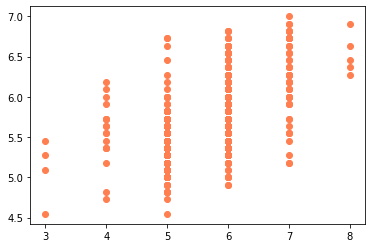

In [12]:
#Nous pouvons visualiser les résultats sur un graphique, en représentant en abscisse les vraies valeurs des étiquettes,
#et en ordonnée les valeurs prédites.
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='coral')



Comme nos étiquettes prennent des valeurs entières entre 3 et 8, nous avons beaucoup de points superposés aux même coordonnées. Pour mieux visualiser les données, nous pouvons utiliser comme marqueurs des cercles dont la taille est proportionnelle au nombre de points qui sont présents à ces coordonnées.


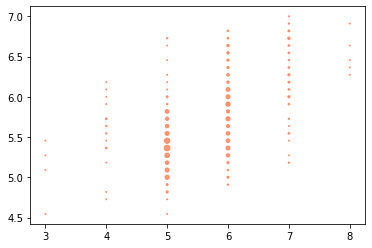

In [13]:
sizes = {} # clé : coordonnées ; valeur : nombre de points à ces coordonnées
for (yt, yp) in zip(list(y_test), list(y_pred)):
    if (yt, yp) in sizes:
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1

keys = sizes.keys()
plt.scatter(
        [k[0] for k in keys], # vraie valeur (abscisse)
        [k[1] for k in keys], # valeur predite (ordonnee)
        s=[sizes[k] for k in keys], # taille du marqueur
        color='coral', alpha =0.8)


On note ainsi une accumulation de prédictions correctes sur la diagonale. Néanmoins le modèle n'est pas très précis dans ses prédictions.


In [14]:
#Pour mieux comprendre notre modèle, comparons-le à une première approche naïve,
#qui consiste à prédire des valeurs aléatoires, distribuées uniformément entre les valeurs basse
#et haute des étiquettes du jeu de données d'entraînement.

y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape)

In [15]:
#Calculons la RMSE correspondante :

print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_random))))

RMSE : 1.67


J'obtiens une RMSE de 1.67, ce qui est bien supérieur à la RMSE obtenue par notre modèle kNN. Notre modèle a ainsi réussi à bien mieux apprendre qu'un modèle aléatoire.

Cependant, beaucoup de nos vins ont une note de 6, et beaucoup de nos prédictions sont autour de cette valeur. Comparons maintenant notre modèle à un modèle aléatoire qui retourne systématiquement la valeur moyenne des étiquettes du jeu de données d'entraînement.


Nous pouvons utiliser pour cela la fonction correspondante du module "dummy" de scikit-learn.

In [16]:
from sklearn import dummy
dum = dummy.DummyRegressor(strategy='mean')

# Entraînement
dum.fit(X_train_std, y_train)

# Prédiction sur le jeu de test
y_pred_dum = dum.predict(X_test_std)

# Evaluate
print("RMSE : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum)) ))


RMSE : 0.81


J'obtiens une RMSE de 0.81, qui est supérieure à celle de 0.68 obtenue par le kNN. Le kNN a donc appris plus que la moyenne des étiquettes…